In [5]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

data_path = 'C:/Users/arwin/Documents/dev/APS360-PROJECT/data/subset'

In [6]:
import librosa
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [7]:
def extract_features(audio_path):
    audio, sample_rate = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate)
    spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=sample_rate)
    chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate)
    tempo, _ = librosa.beat.beat_track(y=audio, sr=sample_rate)

    features = np.hstack([
        np.mean(mfccs, axis=1), np.std(mfccs, axis=1),
        np.mean(spectral_centroids, axis=1),
        np.mean(chroma, axis=1), np.std(chroma, axis=1),
        np.mean(spectral_contrast, axis=1),
        np.array([tempo])
    ])

    return features

In [9]:
def process_folder(folder_path, label):
    features_labels = []
    for i, file in enumerate(os.listdir(folder_path)):
        if file.endswith('.mp3'):
            file_path = os.path.join(folder_path, file)
            try:
                features = extract_features(file_path)
                features_labels.append((features, label))
            except Exception as e:
                print(f"Failed to process {file_path}: {e}")
        print(i)
    return features_labels

hit_path = data_path + '/hit'
miss_path = data_path + '/miss'

hit_features_labels = process_folder(hit_path, 1)  # Billboard songs
miss_features_labels = process_folder(miss_path, 0)  # Non-Billboard songs

# Combine, separate features and labels
all_features_labels = hit_features_labels + miss_features_labels
all_features = np.array([fl[0] for fl in all_features_labels])
labels = np.array([fl[1] for fl in all_features_labels])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89


In [11]:
all_features.shape

(180, 73)

In [10]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(all_features)

# Train the SVM model
model = SVC()
model.fit(scaled_features, labels)


SVC()

In [14]:
# test_folder = '/content/gdrive/MyDrive/APS360BaselineTest'
test_folder = data_path + '/test/hit'


def predict_folder(folder_path, model, scaler):
    for file in os.listdir(folder_path):
        if file.endswith('.mp3'):
            file_path = os.path.join(folder_path, file)
            try:
                features = extract_features(file_path)
                scaled_features = scaler.transform([features])
                prediction = model.predict(scaled_features)
                print(f"Prediction for {file}: {'Billboard Hit' if prediction[0] == 1 else 'Not a Billboard Hit'}")
            except Exception as e:
                print(f"Failed to process {file_path}: {e}")

predict_folder(test_folder, model, scaler)


Prediction for 6LACK Featuring J_ Cole_Pretty Little Fears.mp3: Billboard Hit
Prediction for Black Eyed Peas, Ozuna + J_Rey Soul_Mamacita.mp3: Billboard Hit
Prediction for BLACKPINK_Lovesick Girls.mp3: Billboard Hit
Prediction for Drake_Sandra's Rose.mp3: Billboard Hit
Prediction for Ellie Goulding_Something In The Way You Move.mp3: Billboard Hit
Prediction for j-hope Featuring Becky G__Chicken Noodle Soup.mp3: Billboard Hit
Prediction for Lil Nas X_Tales Of Dominica.mp3: Billboard Hit
Prediction for Linkin Park_In The End.mp3: Billboard Hit
Prediction for Pitbull Featuring Flo Rida & LunchMoney Lewis_Greenlight.mp3: Billboard Hit
Prediction for Queen & David Bowie_Under Pressure.mp3: Not a Billboard Hit


In [15]:
test_folder = data_path + '/test/miss'


def predict_folder(folder_path, model, scaler):
    for file in os.listdir(folder_path):
        if file.endswith('.mp3'):
            file_path = os.path.join(folder_path, file)
            try:
                features = extract_features(file_path)
                scaled_features = scaler.transform([features])
                prediction = model.predict(scaled_features)
                print(f"Prediction for {file}: {'Billboard Hit' if prediction[0] == 1 else 'Not a Billboard Hit'}")
            except Exception as e:
                print(f"Failed to process {file_path}: {e}")

predict_folder(test_folder, model, scaler)

Prediction for Dev Almxghty_Sweep, Pt 2.mp3: Billboard Hit
Prediction for FamilyJules_Accumula Town (From Pokmon Black & White).mp3: Billboard Hit
Prediction for Geowulf_Won't Look Back.mp3: Not a Billboard Hit
Prediction for Marcellina_It's All Love.mp3: Not a Billboard Hit
Prediction for No Thank You_Outdoor Cat.mp3: Not a Billboard Hit
Prediction for OG Ron C_High Rise - Chopped Not Slopped.mp3: Not a Billboard Hit
Prediction for PG RA_What They Want.mp3: Billboard Hit
Prediction for SFG King_Rockstar Life.mp3: Billboard Hit
Prediction for Tobin Sprout_It's Just the Way.mp3: Not a Billboard Hit
Prediction for Zach Deputy_Work It Out - Live Session, GoPro Mountain Games in Vail, CO, 2016.mp3: Billboard Hit


In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(all_features)

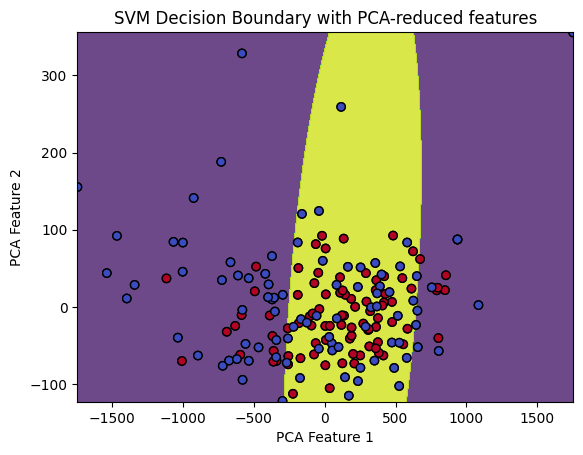

In [20]:
import matplotlib.pyplot as plt
model = SVC()
model.fit(reduced_features, labels)

step_size = 1  # Increase this if you still run into memory issues
x_min, x_max = reduced_features[:, 0].min() - 1, reduced_features[:, 0].max() + 1
y_min, y_max = reduced_features[:, 1].min() - 1, reduced_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),
                     np.arange(y_min, y_max, step_size))

# Predict each point on the mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot also the training points
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM Decision Boundary with PCA-reduced features')

# Plot the support vectors
# plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
#             facecolors='none', edgecolors='k', marker='o')
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap=plt.cm.coolwarm, edgecolors='k')
plt.show()

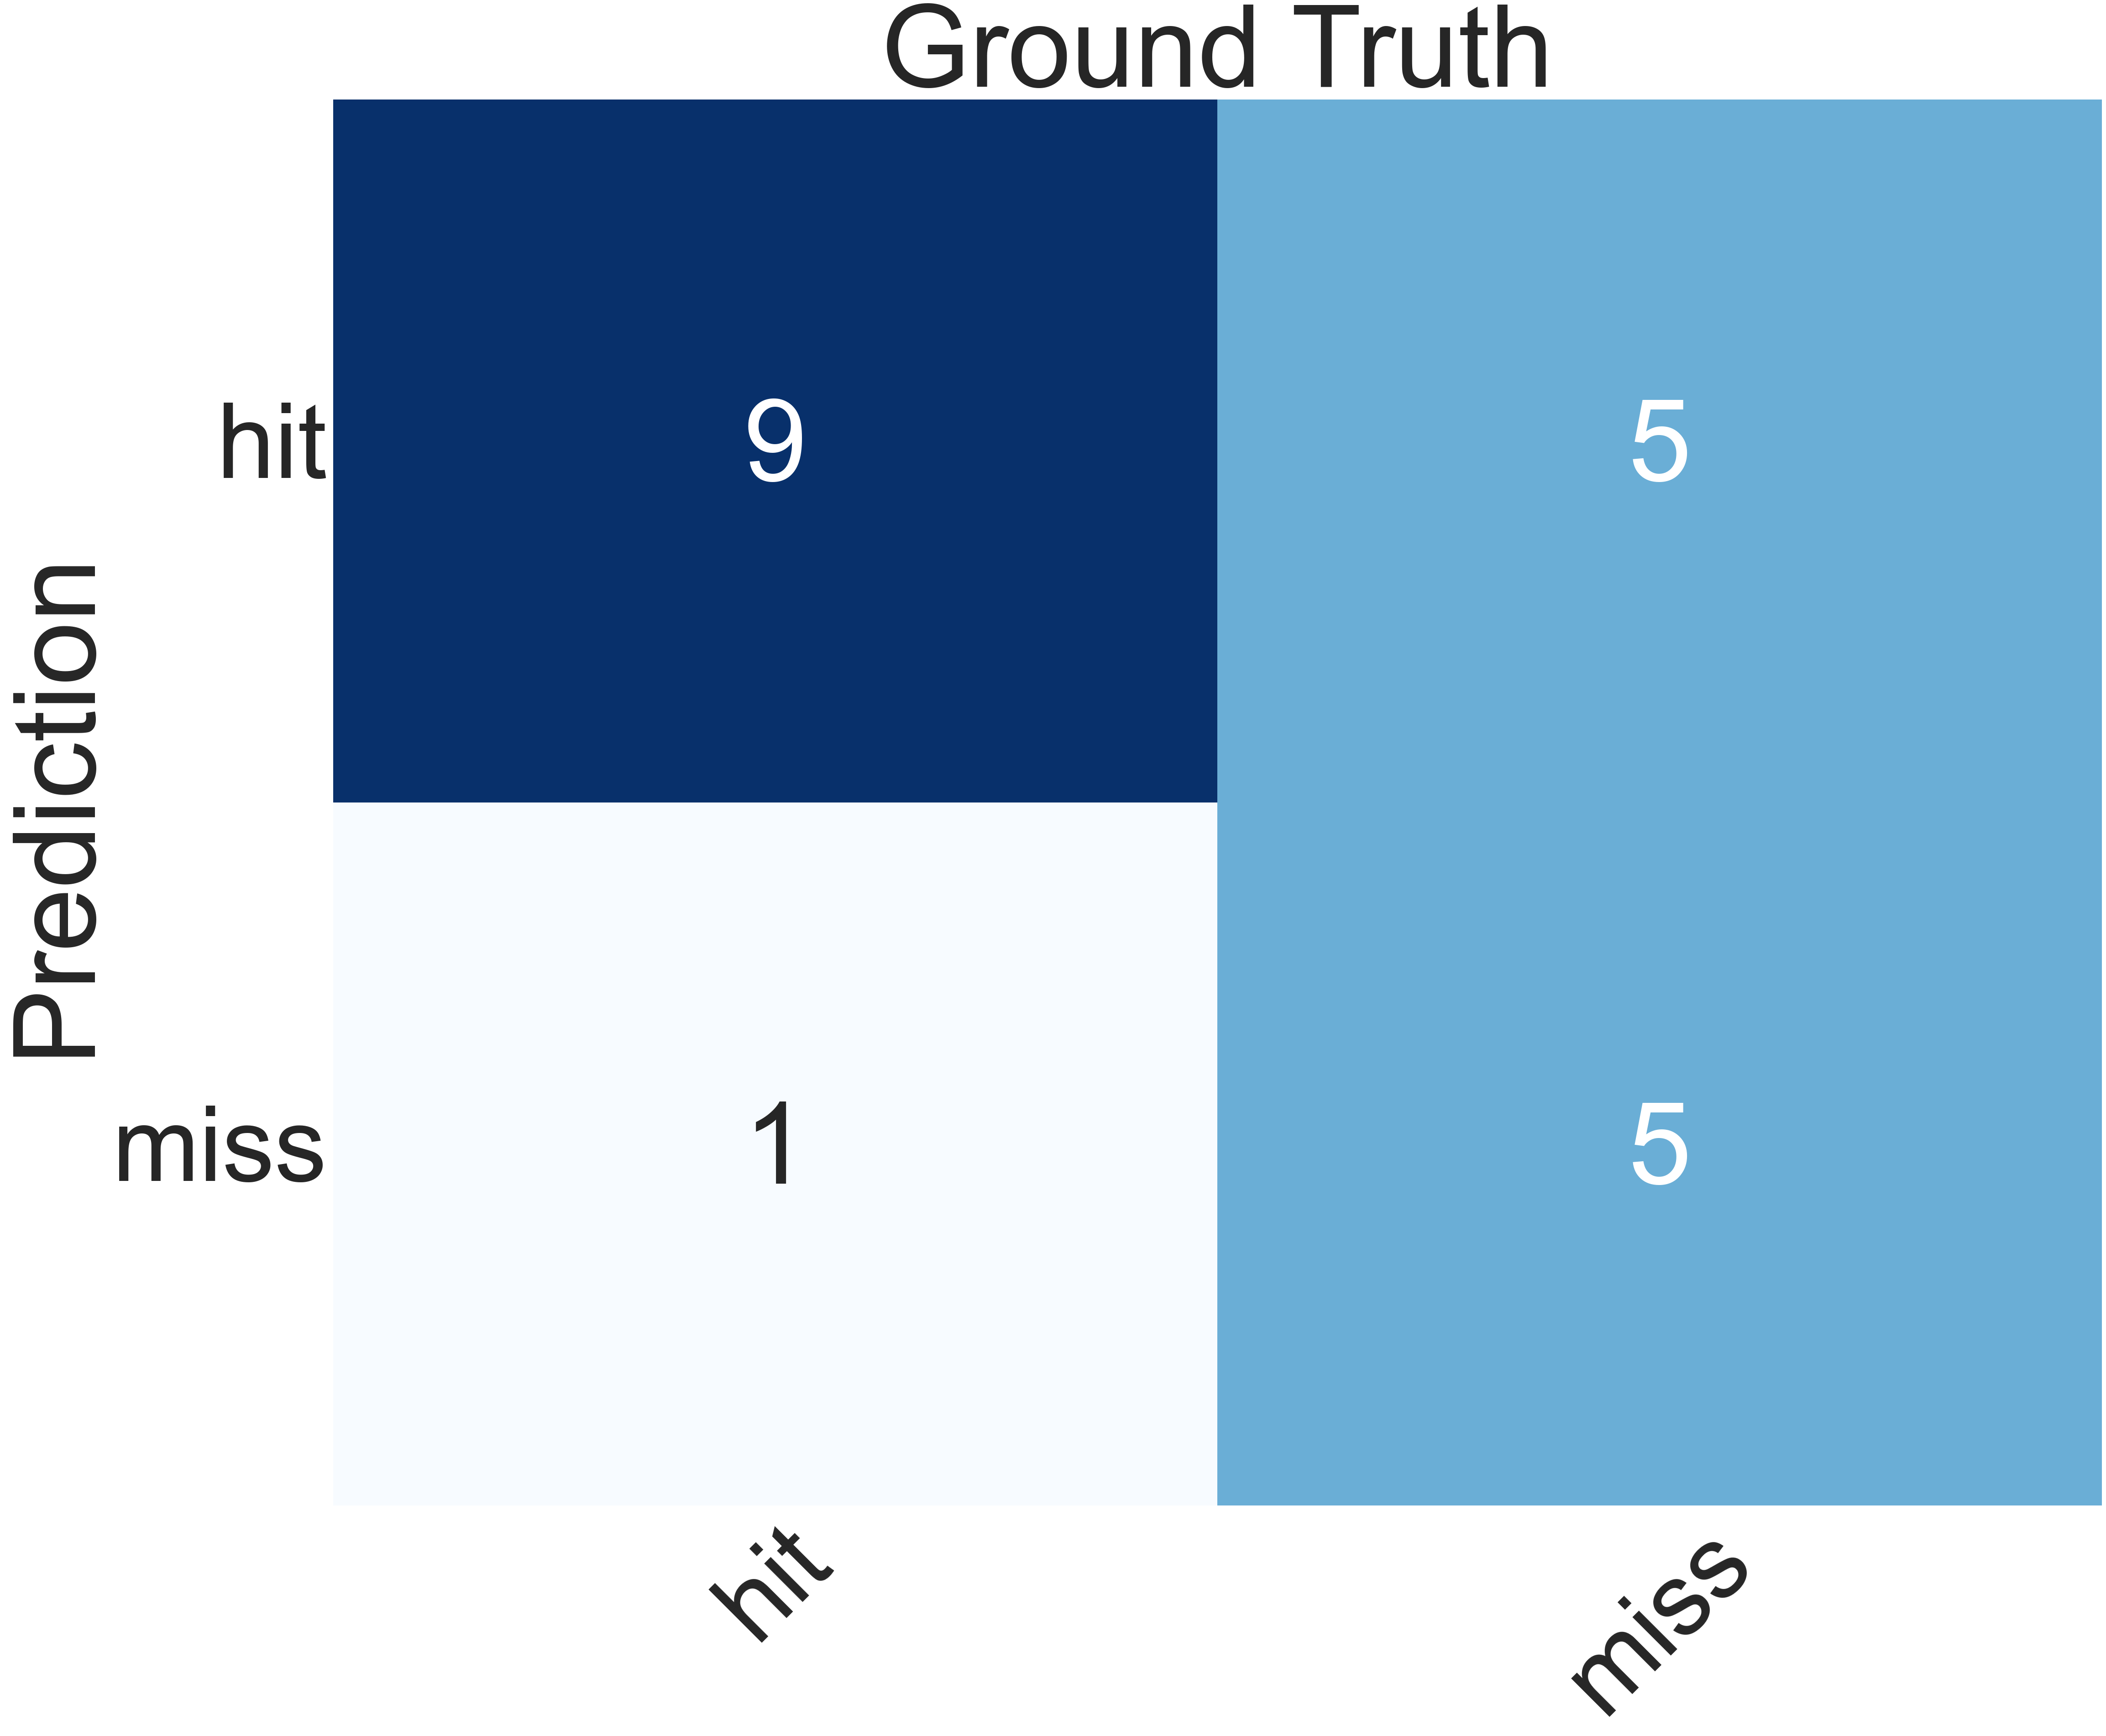

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a confusion matrix data
confusion_matrix = pd.DataFrame({
    'truth': ['hit', 'miss'],
    'hit': [9, 1],
    'miss': [5, 5]
}).set_index('truth')

# Increase the size of all labels and values inside the matrix
sns.set(font_scale=15)  # Increase the font scale by 500%

# Create a heatmap using seaborn
plt.figure(figsize=(50, 40))  # Adjust the figure size accordingly
heatmap = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
heatmap.set_xlabel('Ground Truth', labelpad=20)  # Move the x-axis label to the top
heatmap.xaxis.set_label_position('top') 
heatmap.set_ylabel('Prediction')

# Optionally, you might want to adjust tick parameters for better visibility
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()
